# <span style="font-family:Palatino Linotype"><font color='steelblue'>Correlation Analysis between Job Satisfaction and Employee Performance</font></span> 
## <span style="font-family:Palatino Linotype"><font color='teal'>Paolo G. Hilado</font></span> 

<span style = "font-family:Calibri"><font color = 'steelblue'>Situationer:</font></span> Despite voluminous literatures that confirm the relationship between job satisfaction and employee performance, the company wishes to assess whether such also occurs within its context. Having met the desired sample size using Modified Cochran and randomly sampled participants, gathered data is to be explored to confirm whether a significant relationship exists between aforesaid variables. 

In [39]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Load the data set and check out its structure
df = pd.read_excel("JobSatPerf.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  344 non-null    int64  
 1   JobSat      338 non-null    float64
 2   EmpPerf     338 non-null    float64
 3   EmpID       338 non-null    float64
 4   Sex         338 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 13.6+ KB


In [18]:
# Check out the rows with missing cases
df[df.isnull().any(axis=1)]

,Unnamed: 0,JobSat,EmpPerf,EmpID,Sex
17,18,NaN,NaN,NaN,NaN
51,52,NaN,NaN,NaN,NaN
75,76,NaN,NaN,NaN,NaN
101,102,NaN,NaN,NaN,NaN
251,252,NaN,NaN,NaN,NaN
337,338,NaN,NaN,NaN,NaN


In [19]:
# Since the rows with missing cases are irrelevant, let's remove them
# Also remove unnecessary columns
df = df.dropna()
df = df.iloc[:, 1:3]
df.isnull().any()

JobSat     False
EmpPerf    False
dtype: bool

In [30]:
# Check to see if the assumptions for parametric correlations are met
ad = df.apply(scs.anderson, axis=0)
print("Job Satisfaction p-value:", ad.iloc[1,0][2])
print("Employee Performance p-value:", ad.iloc[1,1][2])

Job Satisfaction p-value: 0.778
Employee Performance p-value: 0.778


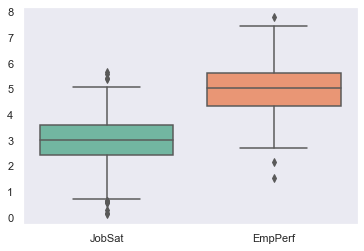

In [37]:
# Check visualizations to asses normality of distribution
sns.set_theme(style="dark")
ax = sns.boxplot(data=df, palette = 'Set2')

QQ-plot of Variable Job Satisfaction


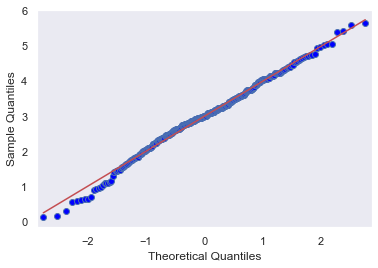

In [40]:
# Let us check the qq-plots for variable Job Satisfaction
print("QQ-plot of Variable Job Satisfaction")
sm.qqplot(df['JobSat'], line ='s'); 

QQ-plot of Variable Employee Performance


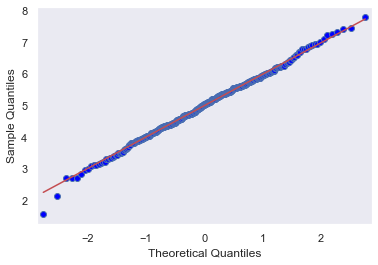

In [41]:
# Let us check the qq-plots for variable Employee Performance
print("QQ-plot of Variable Employee Performance")
sm.qqplot(df['EmpPerf'], line ='s'); 

In [44]:
# Knowing that we have distributions that have outliers
# let us use the non-parametric approach for correlations
corr = scs.kendalltau(df['JobSat'], df['EmpPerf'])
print("Kendall's tau-b:", np.round(corr[0],2), "R-squared", np.round(corr[0]**2,2), "p-value:", np.round(corr[1],2))

Kendall's tau-b: 0.5 R-squared 0.25 p-value: 0.0


<span><font color='steelblue'>Result:</font></span> A correlation analysis was conducted between the variables Job Satisfaction and Employee Performance. It can be observed that there is a moderate positive (r = 0.5) relationship between the aforesaid variables; an increase in Job Satisfaction is likely to lead to an increase in Employee Performance. The variance explained between these variables is at 0.25. Moreover, it can also be observed that the said relationship is statistically significant (p-value <0.05) thus informing us that observations of the sample may also hold true with the population. 